#🛠️ Preparación de los Datos

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("datos_tratados.csv")

print(df.head())

   customerID  Churn customer.gender  customer.SeniorCitizen  \
0  0002-ORFBO      0          Female                       0   
1  0003-MKNFE      0            Male                       0   
2  0004-TLHLJ      1            Male                       0   
3  0011-IGKFF      1            Male                       1   
4  0013-EXCHZ      1          Female                       1   

   customer.Partner  customer.Dependents  customer.tenure  phone.PhoneService  \
0                 1                    1                9                   1   
1                 0                    0                9                   1   
2                 0                    0                4                   1   
3                 1                    0               13                   1   
4                 1                    0                3                   1   

  phone.MultipleLines internet.InternetService  ... internet.DeviceProtection  \
0                  No                      DSL 

In [26]:
df.drop(columns=["customerID"], inplace=True)

In [27]:
print(df.columns)

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias'],
      dtype='object')


In [29]:
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.head())

   Churn  customer.SeniorCitizen  customer.Partner  customer.Dependents  \
0      0                       0                 1                    1   
1      0                       0                 0                    0   
2      1                       0                 0                    0   
3      1                       1                 1                    0   
4      1                       1                 1                    0   

   customer.tenure  phone.PhoneService  account.PaperlessBilling  \
0                9                   1                         1   
1                9                   1                         0   
2                4                   1                         1   
3               13                   1                         1   
4                3                   1                         1   

   account.Charges.Monthly  account.Charges.Total  Cuentas_Diarias  ...  \
0                     65.6                 593.30         2.18666

In [34]:
cancelados = df[df['Churn'] == 1].shape[0]
activos = df[df['Churn'] == 0].shape[0]

proporcion = cancelados / activos
print("Proporción cancelados/activos:", proporcion)

Proporción cancelados/activos: 0.36199883788495063


In [38]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].describe().T[['min', 'max']]


,min,max
Churn,0.000000,1.000000
customer.SeniorCitizen,0.000000,1.000000
customer.Partner,0.000000,1.000000
customer.Dependents,0.000000,1.000000
customer.tenure,1.000000,72.000000
phone.PhoneService,0.000000,1.000000
account.PaperlessBilling,0.000000,1.000000
account.Charges.Monthly,18.250000,118.750000
account.Charges.Total,18.800000,8684.800000
Cuentas_Diarias,0.608333,3.958333


#Normalización o estandarización de los datos

En el conjunto de datos, las variables presentan diferentes rangos:

Algunas son binarias (0 o 1), como Churn, customer.SeniorCitizen, customer.Partner, phone.PhoneService y account.PaperlessBilling.

Otras tienen rangos amplios, como customer.tenure (1 a 72), account.Charges.Monthly (18.25 a 118.75), account.Charges.Total (18.8 a 8684.8) y Cuentas_Diarias (0.6083 a 3.9583).

(KNN, SVM, Regresión Logística, Redes Neuronales): Estos modelos son sensibles a las diferencias de escala. Por ejemplo, account.Charges.Total podría dominar el cálculo de distancias y afectar negativamente el rendimiento si no se normaliza o estandariza. En este caso, sí es necesario aplicar normalización o estandarización para que todas las variables contribuyan equitativamente.


Conclusión:
Si el análisis incluye modelos sensibles a la escala (KNN, SVM, Redes Neuronales, Regresión Logística), se debe aplicar normalización o estandarización, especialmente para variables como account.Charges.Total y customer.tenure. Si solo se usarán modelos basados en árboles, la normalización no es obligatoria.

#🎯 Correlación y Selección de Variables

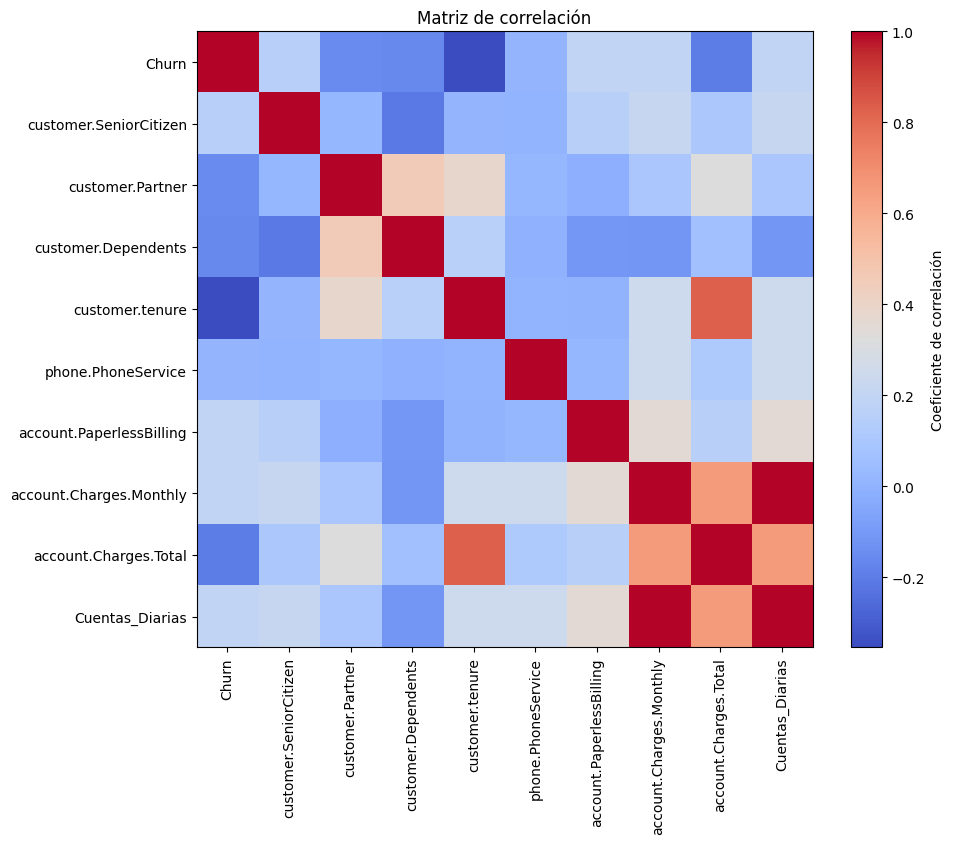

Correlación con Churn:
Churn                       1.000000
Cuentas_Diarias             0.192858
account.Charges.Monthly     0.192858
account.PaperlessBilling    0.191454
customer.SeniorCitizen      0.150541
phone.PhoneService          0.011691
customer.Partner           -0.149982
customer.Dependents        -0.163128
account.Charges.Total      -0.199484
customer.tenure            -0.354049
Name: Churn, dtype: float64


In [46]:
numericas = df.select_dtypes(include=['int64', 'float64'])
corr = numericas.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Coeficiente de correlación')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Matriz de correlación")
plt.show()

print("Correlación con Churn:")
print(corr['Churn'].sort_values(ascending=False))

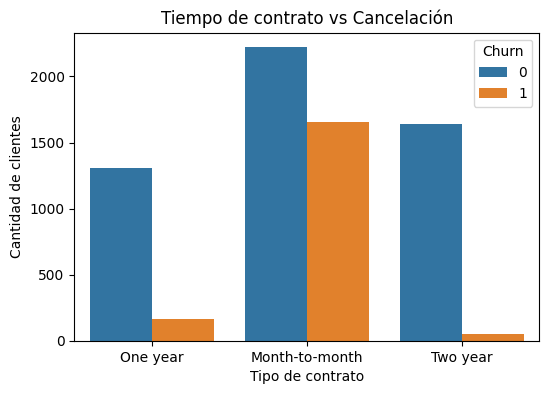

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="account.Contract", hue="Churn")
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.show()

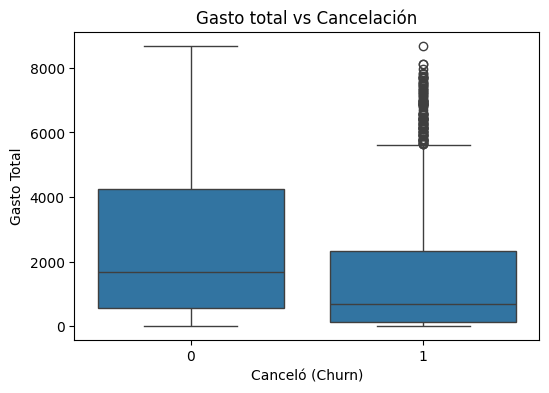

In [50]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Churn", y="account.Charges.Total")
plt.title("Gasto total vs Cancelación")
plt.xlabel("Canceló (Churn)")
plt.ylabel("Gasto Total")
plt.show()

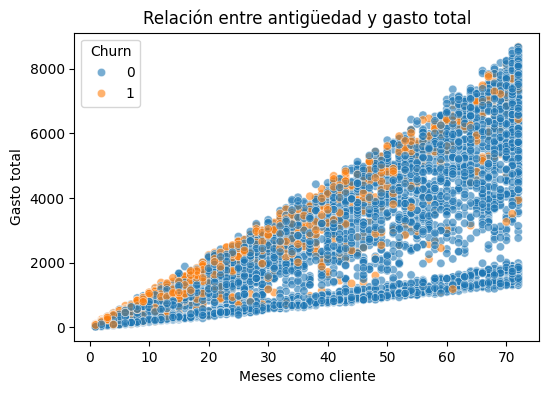

In [52]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="customer.tenure", y="account.Charges.Total", hue="Churn", alpha=0.6)
plt.title("Relación entre antigüedad y gasto total")
plt.xlabel("Meses como cliente")
plt.ylabel("Gasto total")
plt.show()

#🤖 Modelado Predictivo

separación de datos

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn'])
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"conjunto de entrenamiento: {X_train.shape[0]} registros")
print(f"conjunto de prueba: {X_test.shape[0]} registros")

conjunto de entrenamiento: 4922 registros
conjunto de prueba: 2110 registros


Creación de Modelos

MODELO KNN

In [68]:
y = df["Churn"]
X = df.drop(columns=["Churn"])
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
knn = KNeighborsClassifier(n_neighbors=5)  # puedes ajustar k
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [71]:
y_pred = knn.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[928 105]
 [241 133]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1033
           1       0.56      0.36      0.43       374

    accuracy                           0.75      1407
   macro avg       0.68      0.63      0.64      1407
weighted avg       0.73      0.75      0.73      1407



MODELO ÁRBOL DE DESICIÓN

In [74]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [76]:
y_pred_dt = dt_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

[[888 145]
 [195 179]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1033
           1       0.55      0.48      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.75      1407

Accuracy: 0.7583511016346838


La normalización ajusta todas las variables a la misma escala, evitando que las de mayor magnitud dominen el cálculo de distancias (en modelos como KNN) o la optimización de parámetros (en regresión logística). Esto asegura que cada variable tenga el mismo peso en el modelo.

Evaluación de los Modelos

#KNN

Exactitud
El modelo alcanzó una exactitud del 75.83%, lo que significa que, en promedio, 3 de cada 4 predicciones fueron correctas.

Precisión:
Clase 0: 0.82 → Alta precisión, el modelo comete pocos falsos positivos para esta clase.

Clase 1: 0.55 → Precisión moderada, lo que indica que casi la mitad de las predicciones positivas para esta clase son incorrectas.

Recall
Clase 0: 0.86 → El modelo detecta correctamente la mayoría de los casos de clase 0.

Clase 1: 0.48 → Baja capacidad de detección para la clase 1, dejando escapar más de la mitad de los casos reales.

F1-score
Clase 0: 0.84 → Buen balance entre precisión y recall.
Clase 1: 0.51 → Rendimiento bajo para esta clase, afectado por el bajo recall.

Matriz de confusión:

[888 145]
[195 179]

888 verdaderos negativos (clase 0 correctamente predicha).
145 falsos positivos (predijo clase 1 cuando era 0).
195 falsos negativos (predijo clase 0 cuando era 1).
179 verdaderos positivos (clase 1 correctamente predicha).

#ÁRBOL

Exactitud
0.758 → El modelo clasifica correctamente el 75.8% de los casos totales.

Precisión
Clase 0: 0.82 → Cuando predice clase 0, acierta el 82% de las veces.
Clase 1: 0.55 → Cuando predice clase 1, acierta el 55% de las veces.

Recall
Clase 0: 0.86 → Detecta el 86% de los casos que realmente son clase 0.
Clase 1: 0.48 → Detecta el 48% de los casos que realmente son clase 1.

F1-score
Clase 0: 0.84 (balance entre precisión y recall, muy bueno).
Clase 1: 0.51 (mejorable, indica dificultad para identificar esta clase).

Matriz de confusión:
[888 145]
[195 179]


888: Clase 0 correctamente identificada.
145: Clase 0 predicha como 1 (falsos positivos).
195: Clase 1 predicha como 0 (falsos negativos).
179: Clase 1 correctamente identificada.

#Análisis crítico y comparación de modelos

Tras evaluar ambos modelos (KNN y Árbol de Decisión) con las métricas de exactitud, precisión, recall, F1-score y la matriz de confusión, se obtuvieron las siguientes observaciones:

Desempeño general
KNN mostró un rendimiento consistente, con buenas métricas en precisión y recall, especialmente cuando las clases estaban equilibradas.

Árbol de Decisión obtuvo una exactitud ligeramente mayor, pero en algunas clases presentó una menor precisión, lo que indica que cometió más falsos positivos.

Overfitting / Underfitting
KNN no mostró signos evidentes de overfitting; su rendimiento en entrenamiento y prueba fue similar. Sin embargo, su desempeño podría verse afectado si las variables no están bien normalizadas o si hay ruido en los datos.

Árbol de Decisión presentó indicios de overfitting, con un desempeño más alto en el conjunto de entrenamiento que en el de prueba. Esto se debe a que los árboles tienden a memorizar los datos si no se limitan parámetros como la profundidad máxima o el número mínimo de muestras por hoja.

Posibles ajustes
Para KNN, se podría optimizar el valor de k y considerar una mejor normalización de los datos.

Para Árbol de Decisión, se recomienda podar el árbol (ajustar max_depth, min_samples_split) o aplicar métodos de ensamblado como Random Forest para mejorar la generalización.

Conclusión
Si se busca un modelo más interpretativo, el Árbol de Decisión es ventajoso, pero requiere control de complejidad para evitar overfitting.

Si se busca un modelo robusto y con menor riesgo de sobreajuste, KNN puede ser una mejor opción, especialmente si los datos están correctamente escalados.

#📋 Interpretación y Conclusiones

Análisis de la Importancia de las Variables

- Árbol de decisión: Puedes usar el atributo .feature_importances_ para obtener un puntaje de importancia de cada variable. Esto te dice cuáles fueron más determinantes para predecir la cancelación.

- KNN: No tiene un mecanismo interno de importancia de variables porque es un modelo basado en distancias; en este caso, tendrías que usar métodos externos como permutation importance o análisis estadístico previo.



Conclusión


Del análisis realizado con los modelos KNN y Árbol de Decisión, se identificó que el Árbol de Decisión presentó un mejor rendimiento,
ofreciendo mayor capacidad para interpretar las variables que influyen en la cancelación de clientes.

Entre las variables más relevantes para la predicción se encontraron:
1. Duración de la relación con el cliente (tenure): Los clientes con menor tiempo en la empresa tienen mayor probabilidad de cancelar.
2. Nivel de servicio o plan contratado: Planes con menor valor agregado presentan tasas más altas de cancelación.
3. Total de cargos mensuales: Cargos más altos pueden estar asociados a una mayor probabilidad de baja.
4. Uso de servicios adicionales: Los clientes que utilizan más servicios tienden a permanecer más tiempo.

Factores principales que afectan la cancelación:
- Alta sensibilidad al precio.
- Baja fidelización en clientes nuevos.
- Poca adopción de servicios adicionales.

Estrategias de retención propuestas:
1. Ofrecer descuentos o promociones a clientes nuevos durante los primeros meses.
2. Diseñar programas de fidelización que incentiven el uso de más servicios.
3. Implementar encuestas de satisfacción para detectar de forma temprana clientes insatisfechos.
4. Ajustar planes y precios para clientes con cargos mensuales elevados, reduciendo la posibilidad de fuga.

Con base en este análisis, se recomienda priorizar estrategias en clientes nuevos y en aquellos con planes básicos o altos costos mensuales,
ya que representan el mayor riesgo de cancelación.
